In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection

In [24]:
df_train = pd.read_csv("../input/tabular-playground-series-feb-2021/train.csv")

In [25]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,A,B,A,A,B,D,A,E,C,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,B,A,A,A,B,B,A,E,A,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,A,A,A,C,B,D,A,B,C,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,A,A,A,C,B,D,A,E,G,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,A,B,A,A,B,B,A,E,C,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


<AxesSubplot:>

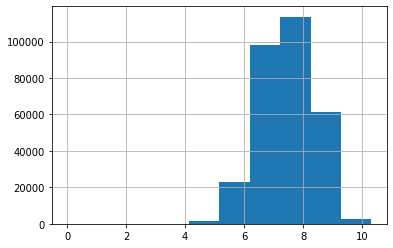

In [26]:
df_train.target.hist()

In [27]:
df_train["kfold"] = -1

In [28]:
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,A,B,A,A,B,D,A,E,C,...,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023,-1
1,2,B,A,A,A,B,B,A,E,A,...,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256,-1
2,3,A,A,A,C,B,D,A,B,C,...,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456,-1
3,4,A,A,A,C,B,D,A,E,G,...,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457,-1
4,6,A,B,A,A,B,B,A,E,C,...,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974,-1


**Benzer 5 parçaya bölmek için bu adımı uyguluyoruz**

In [31]:
kf = model_selection.KFold(n_splits=5,shuffle=True,random_state=42)

for fold,(train_indices,valid_indices) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indices,"kfold"] = fold

In [36]:
df_train.to_csv("train_folds.csv", index = False)